In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    operation2: str
    number2: str
    number3: int
    number4: int
    final1: str
    final2: str

In [ ]:
def adder1(state: AgentState) -> AgentState:
    "This will add two numbers"
    state["final1"] = state["number1"] + state["number2"]
    return state

def subtractor1(state: AgentState) -> AgentState:
    "This will subtract two numbers"
    state["final1"] = state["number1"] - state["number2"]
    return state

def decide_next_node1(state: AgentState) -> str:
    "Decide based on operation1"

    if state["operation1"] == "+":
        return "addition_operation"
    elif state["operation1"] == "-":
        return "subtraction_operation"
    return END

def adder2(state: AgentState) -> AgentState:
    "Adder2"
    state["final2"] = state["number3"] + state["number4"]
    return state

def subtractor2(state: AgentState) -> AgentState:
    "Subtractor2"
    state["final2"] = state["number3"] - state["number4"]
    return state

def decide_next_node2(state: AgentState) -> str:
    "Decide based on operation2"
    
    if state["operation2"] == "+":
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"
    return END

In [30]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder1)
graph.add_node("subtract_node", subtractor1)
graph.add_node("router1", lambda state:state)  #passthrough func

graph.add_node("add_node2", adder1)
graph.add_node("subtract_node2", subtractor1)
graph.add_node("router2", lambda state:state)  #passthrough func

graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    decide_next_node1,
    {
        #Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        #Edge: Node
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)


graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)    

app = graph.compile()


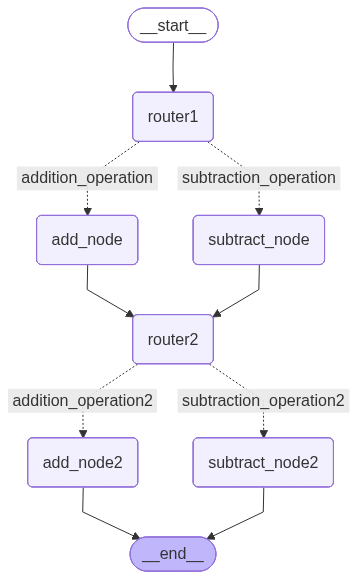

In [31]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [34]:
initial_state = AgentState(number1 = 10, operation1="-", number2 = 5, number3 = 7, number4=2, operation2="+", final1= 0, final2 = 0)

In [35]:
print(app.invoke(initial_state))

{'number1': 10, 'operation1': '-', 'operation2': '+', 'number2': 5, 'number3': 7, 'number4': 2, 'final1': 15, 'final2': 0}
